In [1]:
#Library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('tableau-colorblind10')
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#Load data
birth_rate = pd.read_csv('allBirthData.csv')
print(birth_rate)

         index  Unnamed: 0  State  Month  Year  countyBirths  stateBirths  \
0            0           1      1      1  1985          36.0         5027   
1            1           2      1      2  1985          36.0         4627   
2            2           3      1      3  1985          43.0         4738   
3            3           4      1      4  1985          40.0         4626   
4            4           5      1      5  1985          34.0         4834   
...        ...         ...    ...    ...   ...           ...          ...   
321470  321470      321471     55     12  2015         111.0         5632   
321471  321471      321472     55     12  2015         307.0         5632   
321472  321472      321473     55     12  2015         154.0         5632   
321473  321473      321474     55     12  2015        1848.0         5632   
321474  321474      321475     56     12  2015         661.0          661   

         County  
0        1001.0  
1        1001.0  
2        1001.0  
3  

In [3]:
#Check for Missing Values
missing_values = birth_rate.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
index               0
Unnamed: 0          0
State               0
Month               0
Year                0
countyBirths    28454
stateBirths         0
County           8556
dtype: int64


In [12]:
# Remove rows with missing values in 'countyBirths' and 'stateBirths'
data = birth_rate.dropna(subset=['countyBirths', 'stateBirths'])

In [13]:
#display data
data.head()

,index,Unnamed: 0,State,Month,Year,countyBirths,stateBirths,County
0,0,1,1,1,1985,36.0,5027,1001.0
1,1,2,1,2,1985,36.0,4627,1001.0
2,2,3,1,3,1985,43.0,4738,1001.0
3,3,4,1,4,1985,40.0,4626,1001.0
4,4,5,1,5,1985,34.0,4834,1001.0


In [15]:
# Group the data by 'Year' and calculate the sum of 'countyBirths' and 'stateBirths' for each year
data_clean = data.groupby('Year')[['countyBirths', 'stateBirths']].sum().reset_index()

# Display the summary
data_clean

,Year,countyBirths,stateBirths
0,1985,3714387.0,268238681
1,1986,3708519.0,265221576
2,1987,3759703.0,265491579
3,1988,3859677.0,271408037
4,1989,2945018.0,65326434
5,1990,3044029.0,67717016
6,1991,3008079.0,67020459
7,1992,2976338.0,66187158
8,1993,2929625.0,65061020
9,1994,2970997.0,70947911


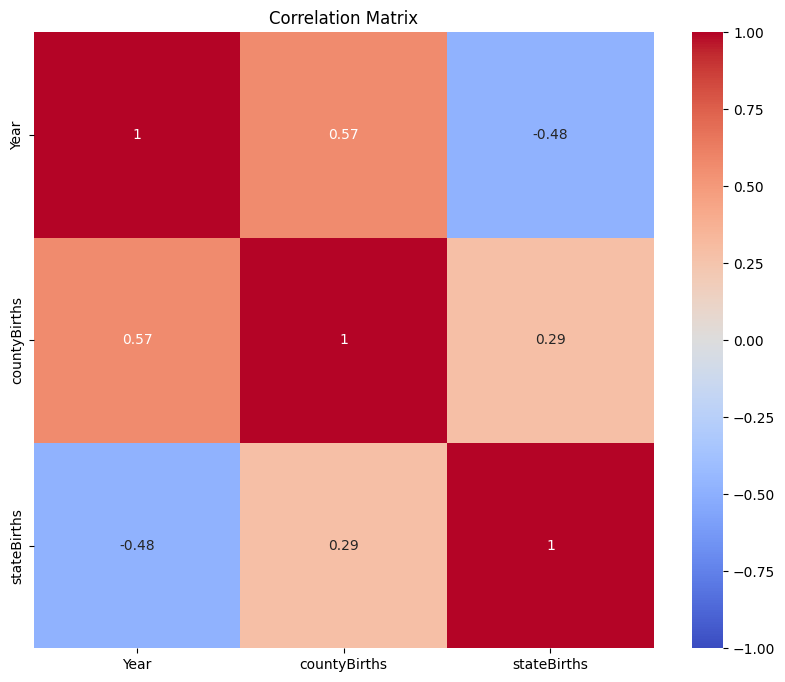

In [16]:
#Compute the correlation matrix
corr_matrix = data_clean.corr()

#Plot the correlation matrix using Matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

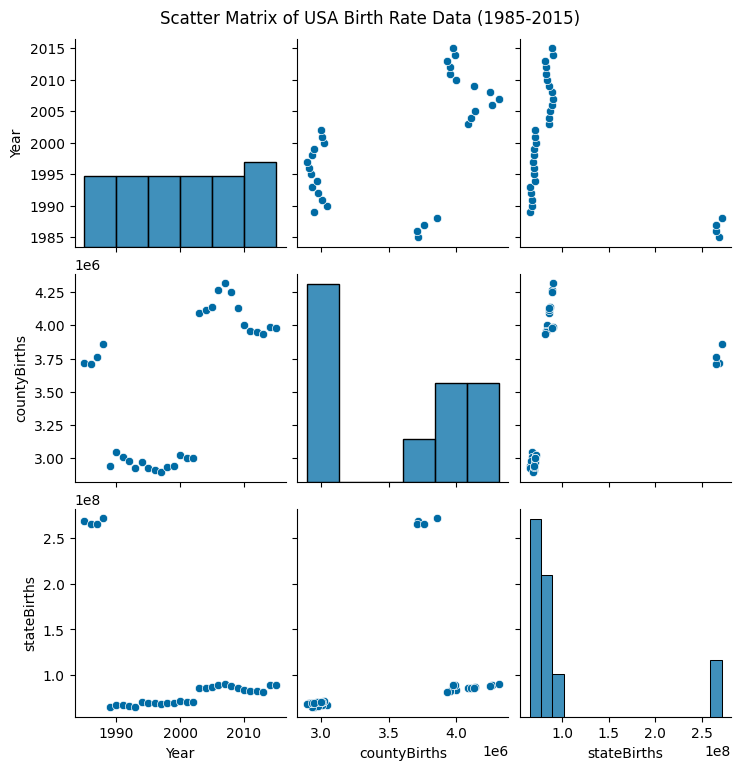

In [17]:
sns.pairplot(data_clean)
plt.suptitle('Scatter Matrix of USA Birth Rate Data (1985-2015)', y=1.02)
plt.show()

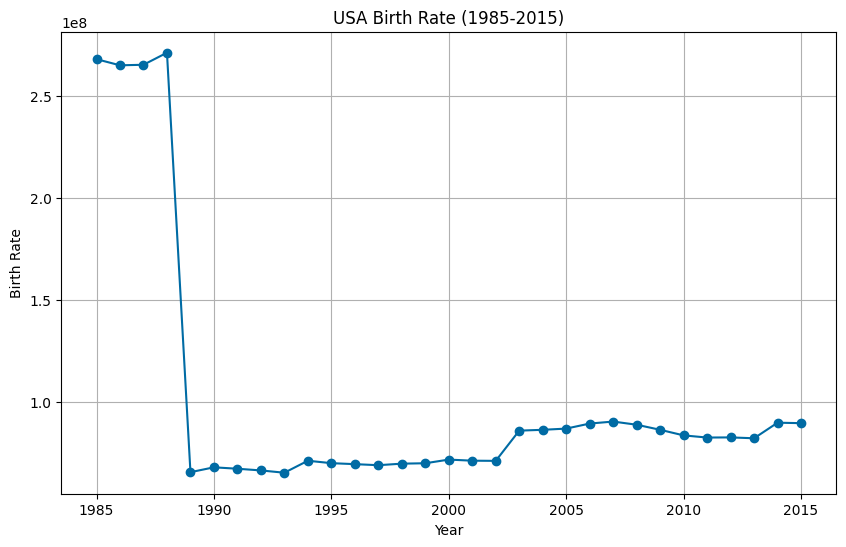

In [18]:
#Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data_clean['Year'], data_clean['stateBirths'], marker='o')
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.title('USA Birth Rate (1985-2015)')
plt.grid(True)
plt.show()

In [21]:
import plotly.express as px

# Plot the yearly total births
fig = px.line(data_clean, x='Year', y='stateBirths', title='Total State Births by Year')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total State Births',
    plot_bgcolor='lightgrey',
    font=dict(family="Courier New", color="blue")
)
fig.show()


In [29]:
#Create the plot
import plotly.express as px

fig = px.line(data_clean, x='Year', y='stateBirths', hover_name='Year',
              hover_data=['Year', 'stateBirths'], width=1200, height=600)

fig.update_layout(
    plot_bgcolor='lightgrey',
    font_family='Courier New', font_color='blue',
    title_font_family='Times New Roman', title_font_color='darkgrey',
    title=dict(
        text='Total births in a year</sup>',
        font=dict(size=30)
    ),
    hoverlabel=dict(
        bgcolor='white', font_size=15, font_family='Times New Roman'
    )
)

fig.update_traces(line_color='darkgrey')

fig.update_xaxes(
    linecolor='lightgrey', mirror=True, ticks='outside', showline=True,
    gridcolor='lightgrey', showspikes=True, spikecolor='orange', spikethickness=2
)

fig.update_yaxes(
    mirror=True, ticks='outside', showline=True, linecolor='lightgrey',
    gridcolor='lightgrey', showspikes=True, spikecolor='green', spikesnap='cursor',
    spikemode='across'
)

fig.add_annotation(
    x=1989, y=65320000,
    text='.',
    showarrow=True, font=dict(family='Courier New, monospace', size=14, color='#ffffff'),
    arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
    bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='#ff7f0e', opacity=0.8
)
fig.add_annotation(
    x=2003, y=85730000,
    text='.',
    showarrow=True, font=dict(family='Courier New, monospace', size=14, color='#ffffff'),
    arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
    bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='#ff7f0e', opacity=0.8
)
fig.add_annotation(
    x=2007, y=90190000,
    text='.',
    showarrow=False, yshift=10, font=dict(family='Courier New, monospace', size=14, color='#ffffff'),
    arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
    bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='#ff7f0e', opacity=0.8
)

fig.show()

In [23]:
# Calculate the birth rate (assuming birth rate as stateBirths per year)
total_births = data_clean['stateBirths'].sum()
data_clean['birthRate'] = data_clean['stateBirths'] / total_births * 1000

# Display the summary
print(data_clean)

    Year  countyBirths  stateBirths  birthRate
0   1985     3714387.0    268238681  85.019473
1   1986     3708519.0    265221576  84.063188
2   1987     3759703.0    265491579  84.148766
3   1988     3859677.0    271408037  86.024015
4   1989     2945018.0     65326434  20.705511
5   1990     3044029.0     67717016  21.463217
6   1991     3008079.0     67020459  21.242440
7   1992     2976338.0     66187158  20.978321
8   1993     2929625.0     65061020  20.621387
9   1994     2970997.0     70947911  22.487264
10  1995     2924073.0     69757520  22.109964
11  1996     2908672.0     69272715  21.956303
12  1997     2893732.0     68757538  21.793015
13  1998     2934372.0     69514847  22.033048
14  1999     2944891.0     69711842  22.095486
15  2000     3023320.0     71511278  22.665826
16  2001     3003512.0     70975344  22.495959
17  2002     3001196.0     70886827  22.467903
18  2003     4089950.0     85735492  27.174255
19  2004     4112052.0     86145223  27.304121
20  2005     

In [34]:
#ARIMA Model
df = data_clean
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.stateBirths.dropna())
print('Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.892604
p-value: 0.046215


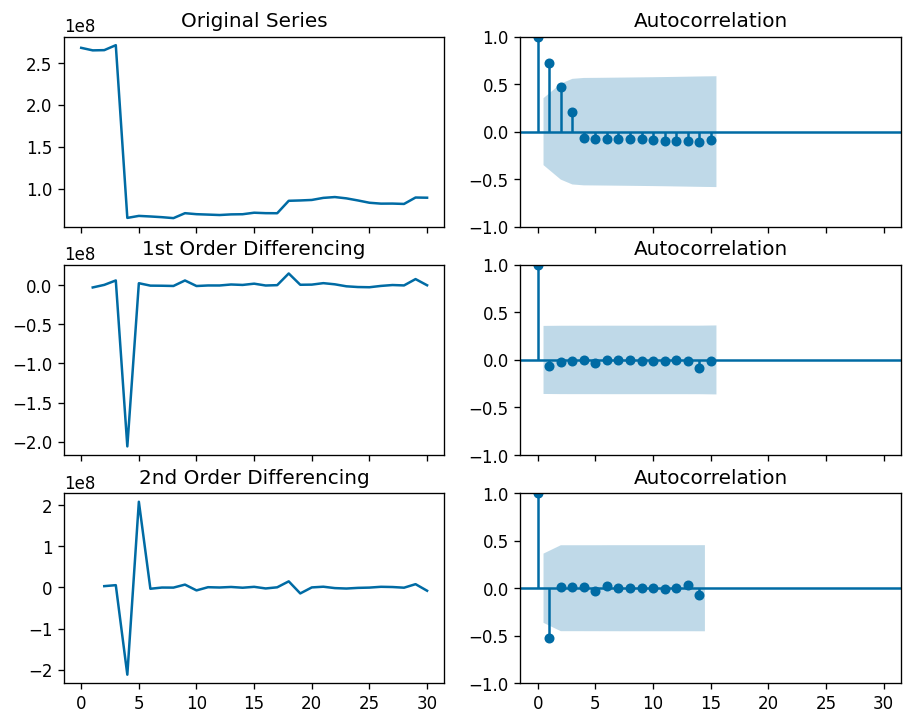

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.stateBirths); axes[0, 0].set_title('Original Series')
plot_acf(df.stateBirths, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.stateBirths.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.stateBirths.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.stateBirths.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.stateBirths.diff().diff().dropna(), ax=axes[2, 1])

plt.show()